In [1]:
# Step 1: Import required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, ConfusionMatrixDisplay, classification_report

In [2]:
# Step 2: Load dataset
# Replace with your actual path
df = pd.read_csv("Global_News_Dataset.csv")

print("Dataset shape:", df.shape)
df.head()

Dataset shape: (105375, 12)


,article_id,source_id,source_name,author,title,description,url,url_to_image,published_at,content,category,full_content
0,89541,NaN,International Business Times,Paavan MATHEMA,UN Chief Urges World To 'Stop The Madness' Of ...,UN Secretary-General Antonio Guterres urged th...,https://www.ibtimes.com/un-chief-urges-world-s...,https://d.ibtimes.com/en/full/4496078/nepals-g...,2023-10-30 10:12:35.000000,UN Secretary-General Antonio Guterres urged th...,Nepal,UN Secretary-General Antonio Guterres urged th...
1,89542,NaN,Prtimes.jp,NaN,RANDEBOOよりワンランク上の大人っぽさが漂うニットとベストが新登場。,[株式会社Ainer]\nRANDEBOO（ランデブー）では2023年7月18日(火)より公...,https://prtimes.jp/main/html/rd/p/000000147.00...,https://prtimes.jp/i/32220/147/ogp/d32220-147-...,2023-10-06 04:40:02.000000,"RANDEBOO2023718()WEB2023 Autumn Winter \n""Nepa...",Nepal,NaN
2,89543,NaN,VOA News,webdesk@voanews.com (Agence France-Presse),UN Chief Urges World to 'Stop the Madness' of ...,UN Secretary-General Antonio Guterres urged th...,https://www.voanews.com/a/un-chief-urges-world...,https://gdb.voanews.com/01000000-0a00-0242-60f...,2023-10-30 10:53:30.000000,"Kathmandu, Nepal UN Secretary-General Antonio...",Nepal,NaN
3,89545,NaN,The Indian Express,Editorial,Sikkim warning: Hydroelectricity push must be ...,Ecologists caution against the adverse effects...,https://indianexpress.com/article/opinion/edit...,https://images.indianexpress.com/2023/10/edit-...,2023-10-06 01:20:24.000000,At least 14 persons lost their lives and more ...,Nepal,At least 14 persons lost their lives and more ...
4,89547,NaN,The Times of Israel,Jacob Magid,"200 foreigners, dual nationals cut down in Ham...","France lost 35 citizens, Thailand 33, US 31, U...",https://www.timesofisrael.com/200-foreigners-d...,https://static.timesofisrael.com/www/uploads/2...,2023-10-27 01:08:34.000000,"Scores of foreign citizens were killed, taken ...",Nepal,NaN


In [3]:
# Step 3: Inspect missing values and datatypes
print("Missing values per column:\n", df.isnull().sum())
print("\nData types:\n", df.dtypes)

Missing values per column:
 article_id          0
source_id       80880
source_name         0
author           8219
title              40
description       383
url                 0
url_to_image     5624
published_at        0
content             0
category           42
full_content    46943
dtype: int64

Data types:
 article_id       int64
source_id       object
source_name     object
author          object
title           object
description     object
url             object
url_to_image    object
published_at    object
content         object
category        object
full_content    object
dtype: object


In [13]:
# Step 4: Fix missing values

# Drop rows with missing category (label)
df = df.dropna(subset=["category"])

# Fill missing author with "unknown"
df["author"] = df["author"].fillna("unknown")

# Fill source_id using source_name as fallback
df["source_id"] = df["source_id"].fillna(df["source_name"])
df["source_id"] = df["source_id"].fillna("unknown")

# Fill missing url_to_image with "no_image"
df["url_to_image"] = df["url_to_image"].fillna("no_image")

# Strip whitespace-only values and replace with "unknown"
for col in ["author", "title", "description", "content", "full_content"]:
    df[col] = df[col].str.strip().replace("", "unknown")

# Create clean content column (lowercase text)
df["content_clean"] = df["content"].str.lower()

In [14]:
# Step 5: Verify all missing values are fixed
missing_total = df.isnull().sum().sum()
print("Missing values =", missing_total)

Missing values = 47345


In [6]:
# Step 6: Split into training and testing sets
X = df["content_clean"]
y = df["category"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print("Training size:", X_train.shape[0])
print("Testing size:", X_test.shape[0])

Training size: 84266
Testing size: 21067


In [7]:
# Step 7: Convert text into numeric features using TF-IDF
vectorizer = TfidfVectorizer(max_features=5000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [8]:
# Step 8: Train Logistic Regression model
model = LogisticRegression(max_iter=200, n_jobs=-1)
model.fit(X_train_vec, y_train)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,200
,multi_class,'deprecated'


In [9]:
# Step 9: Evaluate model
y_pred = model.predict(X_test_vec)

accuracy = accuracy_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred, average="weighted")

print(f"Accuracy: {accuracy:.4f}")
print(f"F1 Score: {f1:.4f}")

Accuracy: 0.3117
F1 Score: 0.3027


In [10]:
# Step 10: Accuracy in percentage
accuracy_percent = accuracy * 100
print(f"Accuracy: {accuracy_percent:.2f}%")

Accuracy: 31.17%


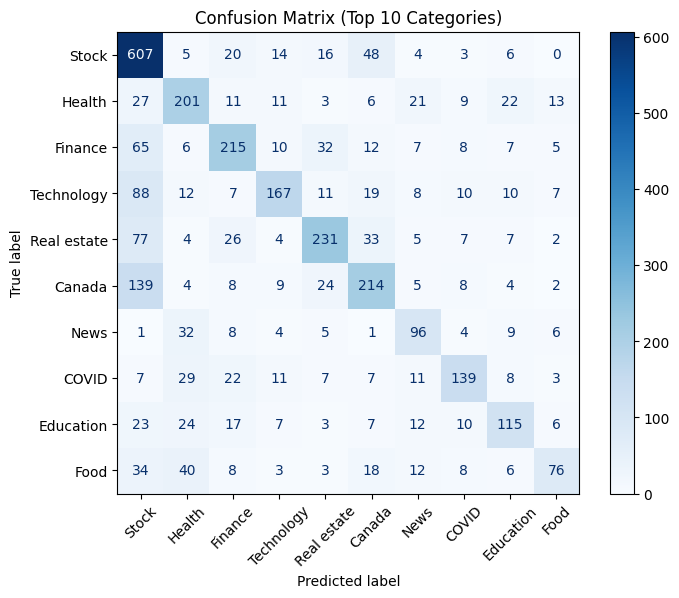

In [11]:
# Step 11: Confusion Matrix for Top 10 categories (for readability)
top_classes = y_train.value_counts().nlargest(10).index
mask = y_test.isin(top_classes)

cm = confusion_matrix(y_test[mask], y_pred[mask], labels=top_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=top_classes)

fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(ax=ax, cmap="Blues", xticks_rotation=45)
plt.title("Confusion Matrix (Top 10 Categories)")
plt.show()

In [12]:
# Step 12: Detailed classification report
print(classification_report(y_test, y_pred))

                                       precision    recall  f1-score   support

                          Afghanistan       0.52      0.26      0.35        53
                               Africa       0.41      0.22      0.28       199
                              Albania       0.50      0.10      0.16        21
                              Algeria       0.00      0.00      0.00        33
                               Amazon       0.39      0.57      0.46       166
                              America       0.37      0.26      0.30       227
                              Andorra       0.00      0.00      0.00         4
                               Angola       0.00      0.00      0.00        14
                                Anime       0.85      0.35      0.49        49
                           Antarctica       0.67      0.38      0.48        53
                         Architecture       0.31      0.23      0.26       162
                            Argentina       0.26   

/opt/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/opt/miniconda3/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
